# 1. Model of the dependence of the change in the angle of deviation of the load on the length of the suspension.

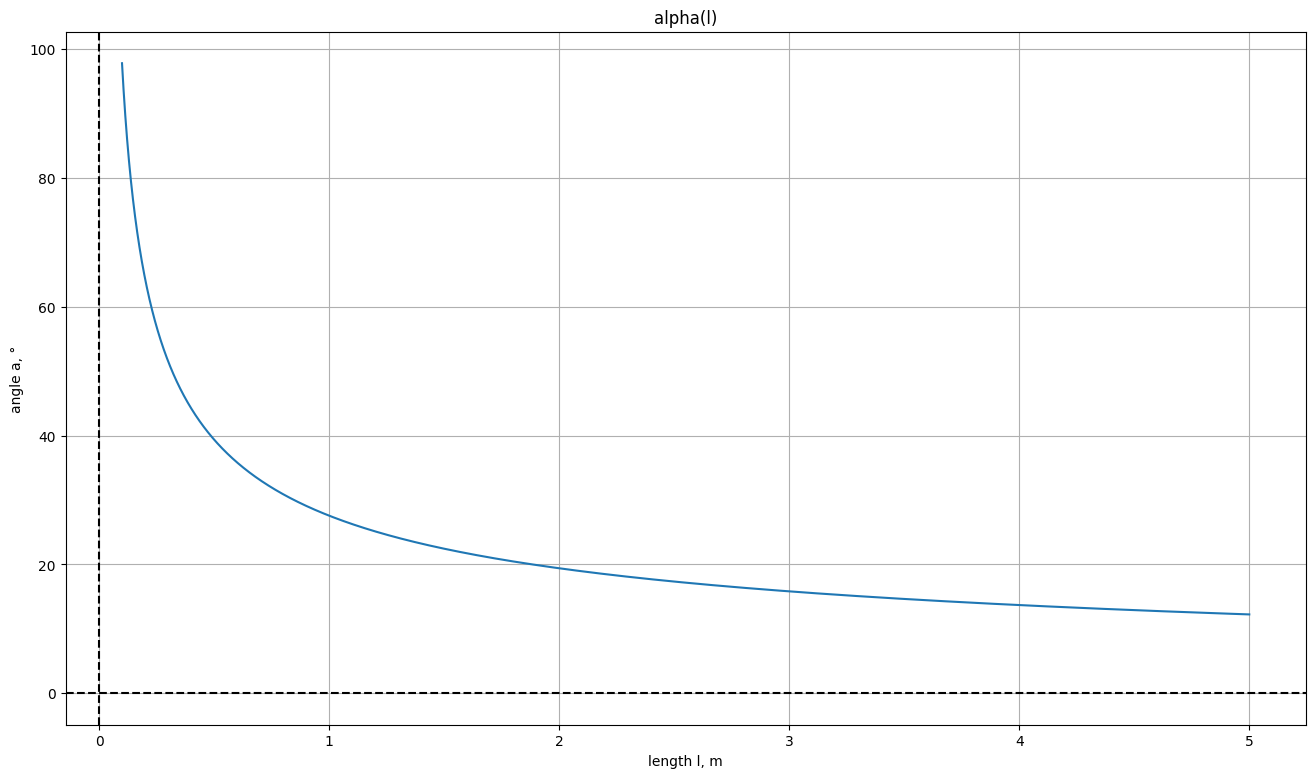

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# m – масса пули;
# M – масса груза;
# l – длина линии подвеса;
# g – ускорение свободного падения;
# v – скорость пули;
# V – скорость системы «пуля-груз»;
# a – угол отклонения подвеса от вертикали.

# Модель: Зависимость изменения угла отклонения груза от длины подвеса a(l) = ?

# Initial values
l = 1
g = 9.8
m = 0.050
M = 10
v = 300

l = np.linspace(0.100, 5.000, 10000, endpoint=True)
a = []
for i in range(len(l)):
    a.append(np.rad2deg(np.arccos(1 - (((m * v)**2) / (2 * (m + M)**2 * g * l[i])))))
fig = plt.fig ure(figsize=(16, 9))
plt.plot(l, a)
plt.title("alpha(l)")
plt.xlabel('length l, m')
plt.ylabel('angle a, °')
plt.axvline(x=0, color='k', linestyle='--', label='x')
plt.axhline(y=0, color='k', linestyle='--', label='y')
plt.grid(True)
plt.show()

# 2. UI for plotting

RadioButtons(description='y = f(x)', index=2, options=('y = sin(x)', 'y = cos(x)', 'y = x^2'), value='y = x^2'…

FloatText(value=0.0, description='Xmin = ')

FloatText(value=10.0, description='Xmax = ')

Button(description='Plot', style=ButtonStyle())

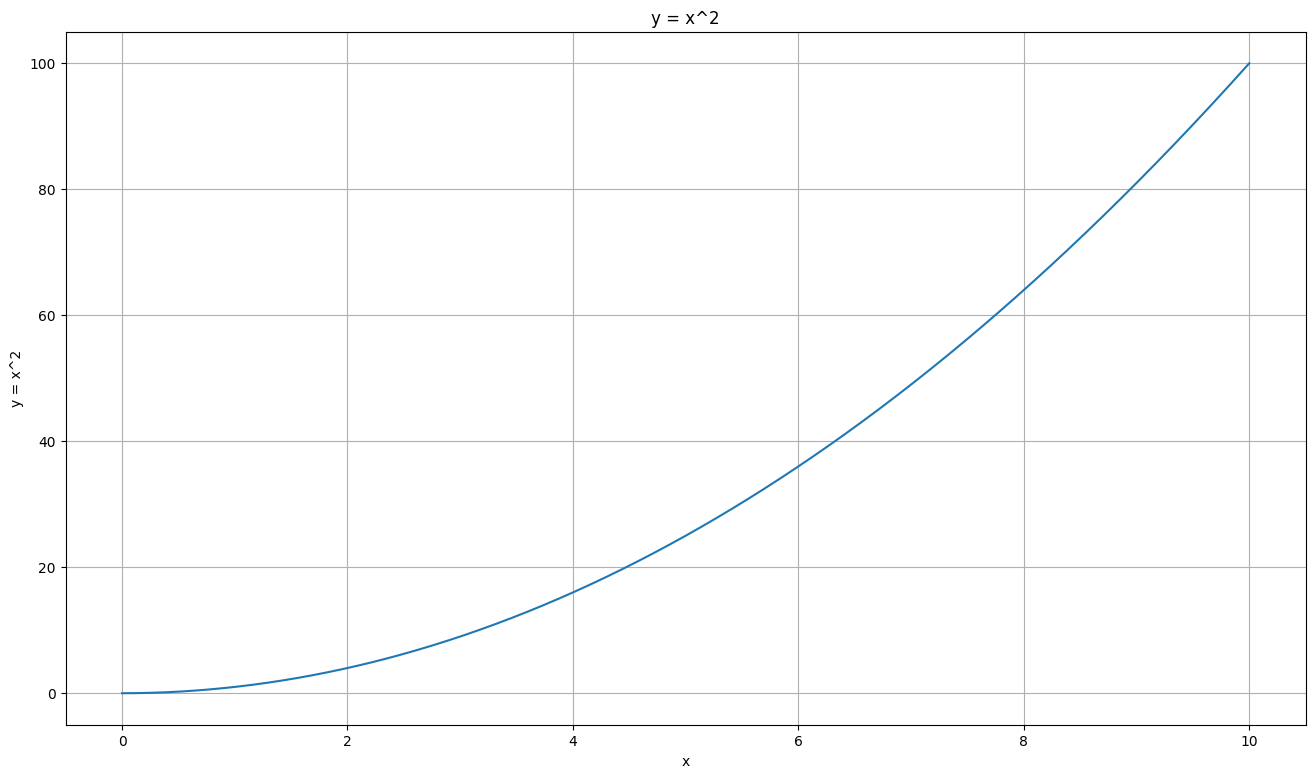

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import numpy as np


def show_gui():
    display(func_radio)
    display(xmin_text)
    display(xmax_text)
    display(plot_btn)

def plot_graph(a):
    clear_output(wait=True)

    show_gui()

    graph_type = func_radio.value
    xmin = xmin_text.value
    xmax = xmax_text.value
    if xmin > xmax:
        print(f'Warning! xmin is bigger than xmax: {xmin} and {xmax}. The variable values have been swapped.')
        xmin, xmax = xmax, xmin

    x = np.linspace(xmin, xmax, int(np.ceil(xmax - xmin)) * 100)

    if graph_type == 'y = sin(x)':
        y = np.sin(x)
        title = graph_type
    elif graph_type == 'y = cos(x)':
        y = np.cos(x)
        title = graph_type
    elif graph_type == 'y = x^2':
        y = x**2
        title = graph_type
    else:
        y = np.zeros_like(x)
        title = 'Unknown graphic'
    # Plot
    plt.figure(figsize=(16, 9))
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel(graph_type)
    plt.grid(True)
    plt.show()

# Plot graphic button
plot_btn = widgets.Button(description="Plot")

# Select function radio box
func_radio = widgets.RadioButtons(
    options=['y = sin(x)', 'y = cos(x)', 'y = x^2'],
    description='y = f(x)',
    disabled=False
)

# Xmin FloatText
xmin_text = widgets.FloatText(
    value=-1.5,
    description='Xmin = ',
    disabled=False
)

# Xmax FloatText
xmax_text = widgets.FloatText(
    value=11.5,
    description='Xmax = ',
    disabled=False
)

# func_radio.observe(plot_graph, 'value')
plot_btn.on_click(plot_graph)

show_gui()

# 3. Laser cutter math model with GUI

In [ ]:
import tkinter as tk
import tkinter.messagebox
import math

# Константа - удельная теплота плавления для стали (примерное значение)

class LaserCutterApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Модель лазерного резчика")

        # Изначальные значения
        self.default_hole_diameter = 10  # мм
        self.default_metal_thickness = 50  # мм
        self.default_laser_power = 1000  # Вт
        self.default_metal_density = 7874  # кг/м³
        self.default_specific_heat_capacity = 640.57 # Дж/(кг·К)

        # Параметры резки
        self.hole_diameter = tk.DoubleVar(value=self.default_hole_diameter)
        self.metal_thickness = tk.DoubleVar(value=self.default_metal_thickness)
        self.laser_power = tk.DoubleVar(value=self.default_laser_power)
        self.metal_density = tk.DoubleVar(value=self.default_metal_density)
        self.specific_heat_capacity = tk.DoubleVar(value=self.default_specific_heat_capacity)

        # Позиция лазера (используем DoubleVar для связи со слайдером)
        self.laser_position = tk.DoubleVar(value=250)
        self.hole_cut = False
        self.animation_running = False

        # Список вырезанных отверстий (сохраняем координаты и размеры)
        self.holes = []

        # Элементы интерфейса для ввода данных
        tk.Label(self.root, text="Диаметр отверстия (мм):").pack()
        tk.Entry(self.root, textvariable=self.hole_diameter).pack()

        tk.Label(self.root, text="Толщина металла (мм):").pack()
        tk.Entry(self.root, textvariable=self.metal_thickness).pack()

        tk.Label(self.root, text="Мощность лазера (Вт):").pack()
        tk.Entry(self.root, textvariable=self.laser_power).pack()

        tk.Label(self.root, text="Плотность металла (кг/м³):").pack()
        tk.Entry(self.root, textvariable=self.metal_density).pack()

        self.start_cutting_button = tk.Button(self.root, text="Начать резку", command=self.start_cutting)
        self.start_cutting_button.pack()

        self.instant_cutting_button = tk.Button(self.root, text="Мгновенная симуляция", command=self.instant_cutting)
        self.instant_cutting_button.pack()

        self.reset_button = tk.Button(self.root, text="Восстановить пластину", command=self.reset_holes)
        self.reset_button.pack()

        # Поле для вывода времени резки
        self.time_label = tk.Label(self.root, text="Время резки: 0 сек")
        self.time_label.pack()

        # Поле для визуализации
        self.canvas = tk.Canvas(self.root, width=500, height=300)
        self.canvas.pack()

        # Добавляем слайдер для управления положением лазера
        tk.Label(self.root, text="Положение лазера (слайдер):").pack()
        self.position_slider = tk.Scale(self.root, from_=0, to=500, orient=tk.HORIZONTAL, variable=self.laser_position, command=self.update_from_slider)
        self.position_slider.pack()

        # Добавляем текстовое поле для ввода точной координаты положения лазера
        tk.Label(self.root, text="Положение лазера (точное значение):").pack()
        self.position_entry = tk.Entry(self.root)
        self.position_entry.pack()
        self.position_entry.bind("<Return>", self.update_from_entry)

        self.update_canvas()

    def update_from_slider(self, event):
        """Обновляем координату лазера при перемещении слайдера."""
        # Ограничиваем позицию лазера в зависимости от диаметра отверстия
        half_hole_diameter = self.hole_diameter.get() / 2
        min_position = half_hole_diameter
        max_position = 500 - half_hole_diameter

        # Проверяем текущее положение лазера
        if self.laser_position.get() < min_position:
            self.laser_position.set(min_position)
        elif self.laser_position.get() > max_position:
            self.laser_position.set(max_position)

        # Обновляем текстовое поле с координатой
        self.position_entry.delete(0, tk.END)
        self.position_entry.insert(0, str(int(self.laser_position.get())))
        self.update_canvas()

    def update_from_entry(self, event):
        """Обновляем координату лазера при вводе в текстовое поле."""
        try:
            position = float(self.position_entry.get())
            half_hole_diameter = self.hole_diameter.get() / 2
            min_position = half_hole_diameter
            max_position = 500 - half_hole_diameter

            if min_position <= position <= max_position:
                self.laser_position.set(position)
                self.position_slider.set(position)
                self.update_canvas()
            else:
                tk.messagebox.showerror("Ошибка", f"Координата должна быть в пределах от {min_position} до {max_position}.")
        except ValueError:
            tk.messagebox.showerror("Ошибка", "Введите корректное число для координаты лазера.")

    def update_canvas(self):
        self.canvas.delete("all")

        # Рассчитываем толщину пластины в пикселях
        thickness_px = self.metal_thickness.get()  # будем использовать прямое значение в мм для пикселей
        if thickness_px < 1:
            thickness_px = 1  # минимальная толщина для визуализации

        # Координаты верхней и нижней границы пластины
        plate_top = 200
        plate_bottom = plate_top + thickness_px

        # Рисуем металлическую пластину с толщиной, зависящей от введённых данных
        self.canvas.create_rectangle(0, plate_top, 500, plate_bottom, fill="grey")

        # Рисуем лазерный луч
        self.canvas.create_line(self.laser_position.get(), 50, self.laser_position.get(), plate_top, fill="red", width=2)

        # Рисуем все отверстия, которые были вырезаны
        for hole in self.holes:
            x_position, diameter, depth = hole
            hole_radius = diameter / 2
            self.canvas.create_rectangle(x_position - hole_radius, plate_top,
                                         x_position + hole_radius, plate_top + depth, fill="black")

    def calculate_cutting_time(self):
        # Преобразуем размеры в метры
        hole_radius_m = (self.hole_diameter.get() / 2) / 1000  # в метры
        thickness_m = self.metal_thickness.get() / 1000  # в метры

        # Площадь отверстия
        hole_area = math.pi * (hole_radius_m ** 2)

        # Объем отверстия
        hole_volume =  hole_area * thickness_m  # м³

        # Время резки (в секундах)

        time_required = (self.metal_thickness.get() * self.specific_heat_capacity.get() * hole_area * self.metal_density.get()) / (self.laser_power.get())
        return time_required

    def start_cutting(self):
        """Начинаем анимацию резки"""
        self.animation_running = True
        self.cut_depth = 0
        self.target_depth = self.metal_thickness.get()

        try:
            # Рассчитываем время резки
            self.total_cutting_time = self.calculate_cutting_time()

            # Устанавливаем интервал для анимации
            self.interval = self.total_cutting_time / 100  # 100 шагов анимации

            # Добавляем новое отверстие в список вырезанных отверстий
            self.holes.append([self.laser_position.get(), self.hole_diameter.get(), 0])

            # Запускаем анимацию
            self.animate_cutting()
        except ValueError:
            tk.messagebox.showerror("Ошибка", "Введите корректные данные для всех параметров.")

    def animate_cutting(self):
        """Анимация прорезания отверстия"""
        if not self.animation_running:
            return

        if self.cut_depth < self.target_depth:
            self.cut_depth += self.target_depth / 100
            self.holes[-1][2] = self.cut_depth
            self.update_canvas()

            # Обновляем время резки
            elapsed_time = (self.cut_depth / self.target_depth) * self.total_cutting_time
            self.time_label.config(text=f"Прошло времени: {elapsed_time:.2f} сек")

            # Рекурсивный вызов через заданный интервал
            self.root.after(int(self.interval * 1000), self.animate_cutting)
        else:
            self.time_label.config(text=f"Время прорезания отверстия: {self.total_cutting_time:.2f} сек")
            self.animation_running = False

    def instant_cutting(self):
        """Завершаем анимацию мгновенно"""
        if self.animation_running:
            self.cut_depth = self.target_depth
            self.holes[-1][2] = self.cut_depth
            self.update_canvas()

            self.time_label.config(text=f"Время прорезания отверстия: {self.total_cutting_time:.2f} сек")
            self.animation_running = False

    def reset_holes(self):
        """Удаляем все вырезанные отверстия и сбрасываем время"""
        self.holes = []
        self.update_canvas()
        self.time_label.config(text="Прошло времени: 0 сек")  # Сброс времени

if __name__ == "__main__":
    root = tk.Tk()
    app = LaserCutterApp(root)
    root.mainloop()


TclError: no display name and no $DISPLAY environment variable